In [1]:

import tensorflow as tf
import numpy 
import matplotlib.pyplot as plt


In [2]:
tf.__version__


'2.1.0'

============== <dtype: 'float32'> <dtype: 'float32_ref'>


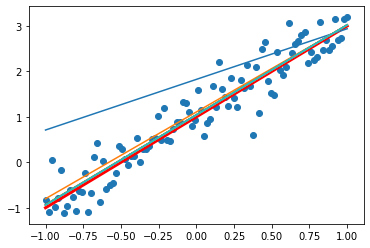

In [10]:
import tensorflow as tf
import numpy as np  # Python的一种开源的数值计算扩展
import matplotlib.pyplot as plt  # Python的一种绘图库

np.random.seed(5)  # 设置产生伪随机数的类型
sx = np.linspace(-1, 1, 100)  # 在-1到1之间产生100个等差数列作为图像的横坐标
# 根据y=2*x+1+噪声产生纵坐标
# randn(100)表示从100个样本的标准正态分布中返回一个样本值，0.4为数据抖动幅度
sy = 2 * sx + 1.0 + np.random.randn(100) * 0.4

plt.scatter(sx, sy)  # 生成散点图
plt.plot(sx, 2 * sx + 1, color='red', linewidth=3)  # 生成直线y=2x+1

# plt.show()

# 定义函数模型，y=kx+b
def model(x, k, b):
    print("==============",x.dtype,k.dtype)
    x = tf.cast(x,dtype=tf.float32)
    return tf.multiply(k, x) + b


# 定义模型中的参数变量，并为其赋初值
k = tf.Variable(1.0, name='k')
b = tf.Variable(0, name='b',dtype=tf.float32)

# 定义训练数据的占位符，x为特征值，y为标签
x = tf.placeholder(dtype=tf.float32,name='x')
y = tf.placeholder(dtype=tf.float32,name='y')
# 通过模型得出特征值x对应的预测值yp
yp = model(x, k, b)
# 训练模型，设置训练参数(迭代次数、学习率)
train_epoch = 10
rate = 0.05
# 定义均方差为损失函数
loss = tf.reduce_mean(tf.square(y - yp))
# 定义梯度下降优化器，并传入参数学习率和损失函数
optimizer = tf.train.GradientDescentOptimizer(rate).minimize(loss)

saver = tf.train.Saver()


ss = tf.Session()
init = tf.global_variables_initializer()
ss.run(init)

# 进行多轮迭代训练，每轮将样本值逐个输入模型，进行梯度下降优化操作得出参数，绘制模型曲线
for _ in range(train_epoch):
    for x1, y1 in zip(sx, sy):
        ss.run([optimizer, loss], feed_dict={x: x1, y: y1})
    tmp_k = k.eval(session=ss)
    tmp_b = b.eval(session=ss)
    plt.plot(sx, tmp_k * sx + tmp_b)
    # Save the variables to disk.
    save_path = saver.save(ss, "/tmp/tf1/kx_lines.ckpt")

ss.close()
plt.show()


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Initial cost= 12.865327835 W= 0.6896504 b= 3.0226834
Epoch: 0001 cost= 4.116676807 W= 0.35716197 b= 2.9731605
Epoch: 0100 cost= 0.295114875 W= -0.013186518 b= 2.6762662
Epoch: 0200 cost= 0.248060867 W= 0.01710117 b= 2.46154
Epoch: 0300 cost= 0.211154595 W= 0.043924823 b= 2.2713726
Epoch: 0400 cost= 0.182207242 W= 0.06768087 b= 2.1029527
Epoch: 0500 cost= 0.159502834 W= 0.088719815 b= 1.9537961
Epoch: 0600 cost= 0.141694874 W= 0.107352555 b= 1.8216984
Epoch: 0700 cost= 0.127727374 W= 0.12385424 b= 1.7047089
Epoch: 0800 cost= 0.116772130 W= 0.1384686 b= 1.6010997
Epoch: 0900 cost= 0.108179495 W= 0.15141149 b= 1.5093404
Epoch: 1000

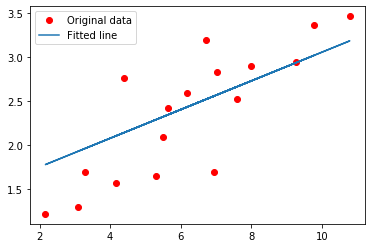

In [2]:
''' Linear Regression with Eager API.
A linear regression learning algorithm example using TensorFlow's Eager API.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())


# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b


# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)


# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
# Compute gradients
grad = tfe.implicit_gradients(mean_square_fn)

# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):

    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))

    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()

In [7]:
# 准备数据
np.random.seed(5)                          #设置产生伪随机数的类型
sx=np.linspace(-1,1,100)                    #在-1到1之间产生100个等差数列作为图像的横坐标
#根据y=2*x+1+噪声产生纵坐标
#randn(100)表示从100个样本的标准正态分布中返回一个样本值，0.4为数据抖动幅度
sy=2*sx+1.0+np.random.randn(100)*0.4
 
# plt.scatter(x,y)                            #生成散点图
# plt.plot(x,2*x+1,color='red',linewidth=3)   #生成直线y=2x+1
print("133")
# 构建模型
#定义函数模型，y=kx+b
def model(x,k,b):
    print("136")
    print(x.dtype)
    return tf.multiply(k,x)+b
#定义模型中的参数变量，并为其赋初值
k=tf.Variable(1.0,name='k')
b=tf.Variable(0.0,name='b')
print("134") 
#定义训练数据的占位符，x为特征值，y为标签
x=tf.placeholder("float",name='x')
y=tf.placeholder("float")
#通过模型得出特征值x对应的预测值yp
print("135")
# print("1",x.dtype,k.dtype,b.type)
yp=model(x,k,b)
# k、b的初始值并不会影响最终结果的得到，所以可以随意指定一个值。

#训练模型
#训练模型，设置训练参数(迭代次数、学习率)
train_epoch=10
rate=0.05
#定义均方差为损失函数
loss=tf.reduce_mean(tf.square(y-yp))
#定义梯度下降优化器，并传入参数学习率和损失函数
optimizer=tf.train.GradientDescentOptimizer(rate).minimize(loss)
 
ss=tf.Session()
init=tf.global_variables_initializer()
ss.run(init)
 
#进行多轮迭代训练，每轮将样本值逐个输入模型，进行梯度下降优化操作得出参数，绘制模型曲线
for _ in range(train_epoch):
    for x1,y1 in zip(sx,sy):
        ss.run([optimizer,loss],feed_dict={x:x1,y:y1})
    tmp_k=k.eval(session=ss)
    tmp_b=b.eval(session=ss)
    plt.plot(sx,tmp_k*sx+tmp_b)
 
ss.close()


133
134


RuntimeError: tf.placeholder() is not compatible with eager execution.

step 0 : [0.05539163, 0.100731514]
step 20 : [0.104750134, 0.19737561]
step 40 : [0.10287757, 0.19841021]
step 60 : [0.101743184, 0.19903694]
step 80 : [0.101056, 0.1994166]
step 100 : [0.1006397, 0.19964658]
step 120 : [0.100387536, 0.1997859]
step 140 : [0.100234754, 0.1998703]
step 160 : [0.100142226, 0.19992143]
step 180 : [0.10008616, 0.1999524]
step 200 : [0.1000522, 0.19997115]


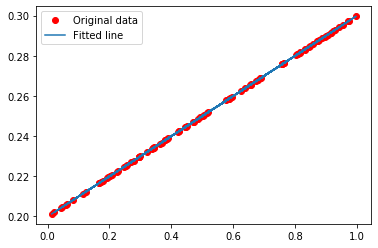

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#使用numpy生成100个随机点
#x_data，y_data表示的就是一条直线，斜率0.1，截距0.2
x_data=np.random.rand(100)
y_data=x_data*0.1+0.2

#构一个造线性模型
b=tf.Variable(0.)  #截距是一个小数的变量，初值为0
k=tf.Variable(0.)   #斜率是一个小数的变量，初值为0
y=k*x_data+b

#定义二次代价函数，reduce_mean表示求平均值
#y_data表示真实值，y表示预测值
loss=tf.reduce_mean(tf.square(y_data-y))

#定义优化器：使用梯度下降法来进行训练的优化器，学习率为0.2
optimizer=tf.train.GradientDescentOptimizer(0.2)

#训练的目的是最小化代价函数
#loss越小，表示我们预测的y越接近于y_data，也就是说k越接近于0.1，b越接近于0.2
train=optimizer.minimize(loss)

#初始化所有变量
init=tf.global_variables_initializer()

saver = tf.train.Saver()

#定义会话
with tf.Session() as sess:
    sess.run(init)
    #迭代训练
    for step in range(201):
        sess.run(train)
        #每迭代20次，输出k和b的值
        if step%20==0:
            print("step",step,":",sess.run([k,b]))
    # Save the variables to disk.
    save_path = saver.save(sess, "/tmp/tf/kx_line.ckpt")
    #Graphic display - matplotlib
    plt.plot(x_data, y_data, 'ro', label='Original data')
    plt.plot(x_data, sess.run(k) * x_data + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [30]:
# Parameters
learning_rate = 0.01
training_epochs = 500
display_step = 50
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
# tf Graph Input
# You must name the variables and placeholders, as the names will be later used!!!
X = tf.placeholder("float", name='X')
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b, name='pred')
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
saver = tf.train.Saver()
# Start training
# sess = tf.Session()
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Save the variables to disk.
    save_path = saver.save(sess, "/tmp/tf/model.ckpt")
    print("Model saved in path: %s" % save_path)
    
    #Graphic display - matplotlib
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(k) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

NameError: name 'rng' is not defined

In [11]:
# import the inspect_checkpoint library
from tensorflow.python.tools import inspect_checkpoint as chkp

# print all tensors in checkpoint file
chkp.print_tensors_in_checkpoint_file("/tmp/tf1/kx_lines.ckpt", tensor_name='', all_tensors=True)

tensor_name:  b
0.0
tensor_name:  b_1
0.0
tensor_name:  b_2
1.0420128
tensor_name:  k
1.0
tensor_name:  k_1
1.0
tensor_name:  k_2
1.9822965
# Total number of params: 6


In [12]:
def predict(sess, inputs):
    preds = sess.run('pred:0', feed_dict={'X:0': inputs}) 
    # `X` is used, it must be defined in the model with that name explicitly!
    return [str(p) for p in preds]

In [13]:

from clipper_admin import ClipperConnection, DockerContainerManager
from clipper_admin.deployers.tensorflow import deploy_tensorflow_model
clipper_conn = ClipperConnection(DockerContainerManager())

In [14]:
clipper_conn.start_clipper()

20-03-12:04:11:29 INFO     [docker_container_manager.py:184] [default-cluster] Starting managed Redis instance in Docker
20-03-12:04:11:33 INFO     [docker_container_manager.py:276] [default-cluster] Metric Configuration Saved at /tmp/tmpz70j0q4s.yml
20-03-12:04:11:34 INFO     [clipper_admin.py:162] [default-cluster] Clipper is running


In [15]:
clipper_conn.connect()

20-03-12:04:11:37 INFO     [clipper_admin.py:172] [default-cluster] Successfully connected to Clipper cluster at localhost:1337


In [14]:
# List all applications
clipper_conn.get_all_apps()

[]

In [15]:

# List all models
clipper_conn.get_all_models()

[]

In [10]:

# Add an application with a name and an input type
clipper_conn.register_application(
    name="tf-app", input_type="doubles", default_output="-1.0", slo_micros=100000)

20-01-09:20:33:03 INFO     [clipper_admin.py:236] [default-cluster] Application tf-app was successfully registered


In [16]:
# Add an application with a name and an input type
clipper_conn.register_application(
    name="tf-app1", input_type="doubles", default_output="-1.0", slo_micros=100000)

20-03-12:04:11:46 INFO     [clipper_admin.py:236] [default-cluster] Application tf-app1 was successfully registered


In [11]:

# Deploy a model, to check what arguments you need run 
# "?deploy_tensorflow_model" to let the notebook show you the definition of the method
deploy_tensorflow_model(
    clipper_conn,
    name="tf-mod",
    version=1,
    input_type="doubles",
    func=predict,
    tf_sess_or_saved_model_path="/tmp/tf/") # path to saved model files is used,
# session example in the next section

20-01-09:20:33:17 INFO     [deployer_utils.py:41] Saving function to /tmp/tmptpnbwhg4clipper
20-01-09:20:33:17 INFO     [deployer_utils.py:51] Serialized and supplied predict function
20-01-09:20:33:17 INFO     [tensorflow.py:264] TensorFlow model copied to: tfmodel 
20-01-09:20:33:17 INFO     [tensorflow.py:277] Using Python 3.6 base image
20-01-09:20:33:17 INFO     [clipper_admin.py:534] [default-cluster] Building model Docker image with model data from /tmp/tmptpnbwhg4clipper
20-01-09:20:33:17 INFO     [clipper_admin.py:539] [default-cluster] Step 1/2 : FROM clipper/tf36-container:0.4.1
20-01-09:20:33:17 INFO     [clipper_admin.py:539] [default-cluster]  ---> 3db42af800ff
20-01-09:20:33:17 INFO     [clipper_admin.py:539] [default-cluster] Step 2/2 : COPY /tmp/tmptpnbwhg4clipper /model/
20-01-09:20:33:17 INFO     [clipper_admin.py:539] [default-cluster]  ---> 8d68c13e2a5c
20-01-09:20:33:17 INFO     [clipper_admin.py:539] [default-cluster] Successfully built 8d68c13e2a5c
20-01-09:20:3

In [17]:
# Deploy a model, to check what arguments you need run 
# "?deploy_tensorflow_model" to let the notebook show you the definition of the method
deploy_tensorflow_model(
    clipper_conn,
    name="tf-mod1",
    version=1,
    input_type="doubles",
    func=predict,
    tf_sess_or_saved_model_path="/tmp/tf1/") # path to saved model files is used,

20-03-12:04:12:08 INFO     [deployer_utils.py:41] Saving function to /tmp/tmpze4ubivwclipper
20-03-12:04:12:08 INFO     [deployer_utils.py:51] Serialized and supplied predict function
20-03-12:04:12:08 INFO     [tensorflow.py:264] TensorFlow model copied to: tfmodel 
20-03-12:04:12:08 INFO     [tensorflow.py:277] Using Python 3.6 base image
20-03-12:04:12:08 INFO     [clipper_admin.py:534] [default-cluster] Building model Docker image with model data from /tmp/tmpze4ubivwclipper
20-03-12:04:12:09 INFO     [clipper_admin.py:539] [default-cluster] Step 1/2 : FROM clipper/tf36-container:0.4.1
20-03-12:04:12:09 INFO     [clipper_admin.py:539] [default-cluster]  ---> 3db42af800ff
20-03-12:04:12:09 INFO     [clipper_admin.py:539] [default-cluster] Step 2/2 : COPY /tmp/tmpze4ubivwclipper /model/
20-03-12:04:12:09 INFO     [clipper_admin.py:539] [default-cluster]  ---> b03a411a7376
20-03-12:04:12:09 INFO     [clipper_admin.py:539] [default-cluster] Successfully built b03a411a7376
20-03-12:04:1

In [18]:
# Link the model and the app
clipper_conn.link_model_to_app(
    app_name="tf-app1",
    model_name="tf-mod1")


20-03-12:04:12:37 INFO     [clipper_admin.py:303] [default-cluster] Model tf-mod1 is now linked to application tf-app1


In [22]:

# Show the apps again, should list one
clipper_conn.get_all_apps()

['tf-app1']

In [21]:
# Get query address
query_address = clipper_conn.get_query_addr()
print(query_address)

localhost:1337


In [25]:

# Run a query
import requests, json, numpy as np
headers = {"Content-type": "application/json"}
requests.post("http://"+query_address+"/tf-app1/predict", headers=headers, data=json.dumps({
    "input": [.8, 3.2]})).json()

{'query_id': 3,
 'output': -1.0,
 'default': True,
 'default_explanation': 'No connected models found for query'}

In [16]:
# Clipper allows to deploy a TensorFlow model using a session variable too
# First the model must be restored from the files
# Pay attention to the fact that variables/placeholders are restored 
# with exactly the same names
tf.reset_default_graph()

W = tf.get_variable("weight", shape=[])
b = tf.get_variable("bias", shape=[])

X = tf.placeholder("float", name='X')
pred = tf.add(tf.multiply(X, W), b, name='pred')

saver = tf.train.Saver()
sess = tf.Session()

# Restore variables from disk.
saver.restore(sess, "/tmp/tf/model.ckpt")
print("Model restored.")
print("W : %s" % W.eval(session=sess))
print("b : %s" % b.eval(session=sess))

INFO:tensorflow:Restoring parameters from /tmp/tf/model.ckpt


20-01-09:20:35:50 INFO     [saver.py:1284] Restoring parameters from /tmp/tf/model.ckpt


Model restored.
W : 0.31112754
b : 0.35879555


In [17]:

# Check that the session variable exists
sess

In [18]:
deploy_tensorflow_model(
    clipper_conn,
    name="tf-mod",
    version=2, # version 2 of the same model, `predict` endpoint will be updated 
    # automatically to the newest model version
    input_type="doubles",
    func=predict,
    tf_sess_or_saved_model_path=sess) # `sess` variable is used here

20-01-09:20:37:33 INFO     [deployer_utils.py:41] Saving function to /tmp/tmpt1hw5uj9clipper
20-01-09:20:37:33 INFO     [deployer_utils.py:51] Serialized and supplied predict function
20-01-09:20:37:33 INFO     [tensorflow.py:196] TensorFlow model saved at: /tmp/tmpt1hw5uj9clipper/tfmodel/model.ckpt 
20-01-09:20:37:33 INFO     [tensorflow.py:277] Using Python 3.6 base image
20-01-09:20:37:33 INFO     [clipper_admin.py:534] [default-cluster] Building model Docker image with model data from /tmp/tmpt1hw5uj9clipper
20-01-09:20:37:33 INFO     [clipper_admin.py:539] [default-cluster] Step 1/2 : FROM clipper/tf36-container:0.4.1
20-01-09:20:37:33 INFO     [clipper_admin.py:539] [default-cluster]  ---> 3db42af800ff
20-01-09:20:37:33 INFO     [clipper_admin.py:539] [default-cluster] Step 2/2 : COPY /tmp/tmpt1hw5uj9clipper /model/
20-01-09:20:37:33 INFO     [clipper_admin.py:539] [default-cluster]  ---> 9aa8b9159610
20-01-09:20:37:33 INFO     [clipper_admin.py:539] [default-cluster] Successfull

In [19]:

# Session can be closed now
sess.close()

In [20]:
# Run a query
headers = {"Content-type": "application/json"}
requests.post("http://"+query_address+"/tf-app/predict", headers=headers, data=json.dumps({
    "input": [.8, 3.2]})).json()
# The result is the same

{'query_id': 1, 'output': '[0.6076976 1.3544037]', 'default': False}

In [21]:
# You can revert to the previous model version, the query endpoint remains the same
clipper_conn.set_model_version("tf-mod", "1")

In [22]:
# Replicate the model 5 times
clipper_conn.set_num_replicas("tf-mod", 5)

20-01-09:20:38:54 INFO     [docker_container_manager.py:409] [default-cluster] Found 1 replicas for tf-mod:1. Adding 4


In [23]:
# Back to one replica
clipper_conn.set_num_replicas("tf-mod", 1)

20-01-09:20:39:06 INFO     [docker_container_manager.py:427] [default-cluster] Found 5 replicas for tf-mod:1. Removing 4


In [24]:
# You can also register more applications - connections to the model and link them to it
clipper_conn.register_application(
    name="tf-app-extra", input_type="doubles", default_output="-1.0", slo_micros=100000)
# You have to link them the standard way. You can also link an existing application 
# to another model if you wish using the same method
clipper_conn.link_model_to_app(
    app_name="tf-app-extra",
    model_name="tf-mod")

20-01-09:20:41:01 INFO     [clipper_admin.py:236] [default-cluster] Application tf-app-extra was successfully registered
20-01-09:20:41:01 INFO     [clipper_admin.py:303] [default-cluster] Model tf-mod is now linked to application tf-app-extra


In [25]:
# Run a query with an endpoint `tf-app-extra/predict`
headers = {"Content-type": "application/json"}
requests.post("http://"+query_address+"/tf-app-extra/predict", headers=headers, data=json.dumps({
    "input": [.8, 3.2]})).json()

{'query_id': 2, 'output': '[0.6076976 1.3544037]', 'default': False}

In [26]:
# Unlink the model and the apps
clipper_conn.unlink_model_from_app(model_name="tf-mod", app_name="tf-app")
clipper_conn.unlink_model_from_app(model_name="tf-mod", app_name="tf-app-extra")

20-01-09:20:42:03 INFO     [clipper_admin.py:344] Model tf-mod is now removed to application tf-app
20-01-09:20:42:03 INFO     [clipper_admin.py:344] Model tf-mod is now removed to application tf-app-extra


In [27]:
# Stop the model
clipper_conn.stop_models('tf-mod')

20-01-09:20:42:38 INFO     [clipper_admin.py:1285] Model tf-mod:1 was successfully deleted
20-01-09:20:42:38 INFO     [clipper_admin.py:1285] Model tf-mod:2 was successfully deleted
20-01-09:20:42:38 INFO     [clipper_admin.py:1319] [default-cluster] Stopped all containers for these models and versions:
{'tf-mod': ['1', '2']}


In [28]:
# Remove the apps
clipper_conn.delete_application('tf-app')
clipper_conn.delete_application('tf-app-extra')

20-01-09:20:43:08 WARNING  [clipper_admin.py:240] [default-cluster] [DEPRECATED] Use 'unregister_application' API instead of this.
20-01-09:20:43:08 INFO     [clipper_admin.py:260] [default-cluster] Application tf-app was successfully unregistered
20-01-09:20:43:08 WARNING  [clipper_admin.py:240] [default-cluster] [DEPRECATED] Use 'unregister_application' API instead of this.
20-01-09:20:43:08 INFO     [clipper_admin.py:260] [default-cluster] Application tf-app-extra was successfully unregistered


In [26]:
# Stop Clipper
clipper_conn.stop_all()

20-03-12:04:27:05 INFO     [clipper_admin.py:1424] [default-cluster] Stopped all Clipper cluster and all model containers
